In [12]:
import pandas as pd

In [13]:
# Load Data
file_path = './merged_df_fixed.csv'
df = pd.read_csv(file_path)

In [14]:
# Select numerical columns
numeric_cols = ['admission_count', 'readmission_count', 'length_of_stay_avg', 
                'daily_medication_dosage', 'emergency_visit_count', 'comorbid_conditions_count', 
                'temperature', 'humidity', 'wind_speed', 'value', 'severity_numeric', 
                'emergency_ratio', 'temp_humidity_index', 'wind_PM']

# Compute correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Display the matrix
print(correlation_matrix)

                           admission_count  readmission_count  \
admission_count                   1.000000          -0.000698   
readmission_count                -0.000698           1.000000   
length_of_stay_avg               -0.006248          -0.008988   
daily_medication_dosage           0.001501          -0.002384   
emergency_visit_count            -0.011752           0.004924   
comorbid_conditions_count        -0.006320          -0.007551   
temperature                       0.007337           0.003128   
humidity                          0.001594           0.002297   
wind_speed                        0.001169          -0.014415   
value                             0.001998           0.000452   
severity_numeric                  0.006071           0.003309   
emergency_ratio                  -0.384637           0.009944   
temp_humidity_index               0.004625           0.001281   
wind_PM                           0.003837          -0.014652   

                        

                           admission_count  readmission_count  \
admission_count                   1.000000          -0.001172   
readmission_count                -0.001172           1.000000   
length_of_stay_avg               -0.010227          -0.007206   
daily_medication_dosage          -0.000421          -0.001418   
emergency_visit_count            -0.013175           0.002963   
comorbid_conditions_count        -0.004752          -0.006264   
temperature                       0.008348           0.004515   
humidity                          0.000524           0.003868   
wind_speed                        0.000113          -0.014402   
value                             0.002359           0.005196   
severity_numeric                  0.000325           0.003004   
emergency_ratio                  -0.384434           0.008584   
temp_humidity_index               0.004499           0.002880   
wind_PM                           0.004423          -0.014488   

                        

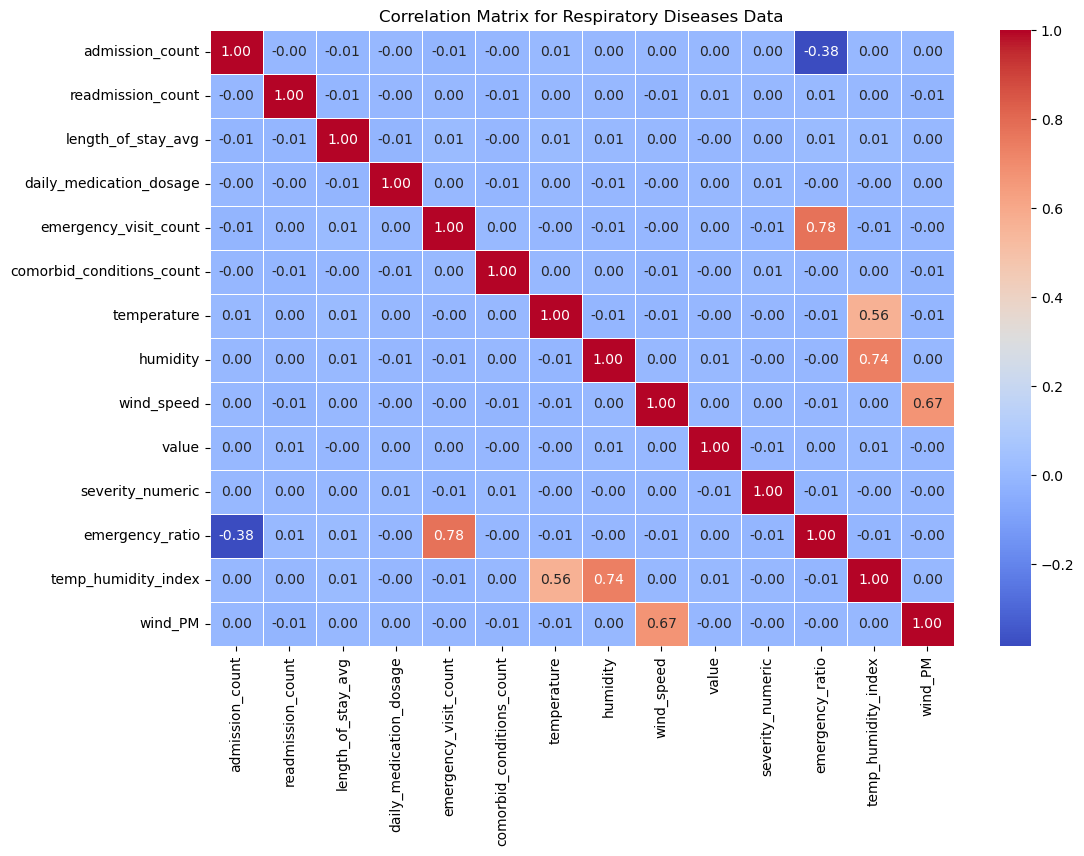

In [15]:
# Filter for respiratory diseases
respiratory_conditions = ['Asthma', 'COPD', 'Other Respiratory Issues']
respiratory_df = df[df['condition_type'].isin(respiratory_conditions)]

# Select numerical columns
numeric_cols = ['admission_count', 'readmission_count', 'length_of_stay_avg', 
                'daily_medication_dosage', 'emergency_visit_count', 'comorbid_conditions_count', 
                'temperature', 'humidity', 'wind_speed', 'value', 'severity_numeric', 
                'emergency_ratio', 'temp_humidity_index', 'wind_PM']

# Compute correlation matrix
respiratory_corr = respiratory_df[numeric_cols].corr()

# Display
print(respiratory_corr)

import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
respiratory_corr = respiratory_df[numeric_cols].corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(respiratory_corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

# Add title
plt.title('Correlation Matrix for Respiratory Diseases Data')

# Display the plot
plt.show()

In [16]:
respiratory_df = df[df['condition_type'].isin(['Asthma', 'COPD', 'Other Respiratory Issues'])]
print(respiratory_df.groupby('hospital_name')['admission_count'].sum().sort_values(ascending=False))

# “Riyadh hospitals handle the bulk of respiratory cases, with Riyadh National leading at 16,893 admissions.”

hospital_name
Riyadh National Hospital      16893
King Saud Hospital            16505
Riyadh General Hospital       15958
Jeddah National Hospital       6765
Dammam General Hospital        6366
Dammam Central Hospital        6300
Mecca City Hospital            5525
Medina Specialist Hospital     5385
Name: admission_count, dtype: int64


In [17]:
respiratory_df['month'] = pd.to_datetime(respiratory_df['date']).dt.month
print(respiratory_df.groupby('month')['admission_count'].sum())

month
1     7334
2     6671
3     7247
4     6796
5     7850
6     7391
7     7182
8     7276
9     7155
10    5045
11    4741
12    5009
Name: admission_count, dtype: int64


/tmp/ipykernel_11804/408239917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respiratory_df['month'] = pd.to_datetime(respiratory_df['date']).dt.month


In [18]:
print(respiratory_df.groupby('patient_age_group')['admission_count'].sum().sort_values(ascending=False))

patient_age_group
18-45    32851
46-65    23130
0-17     15981
66+       7735
Name: admission_count, dtype: int64


In [19]:
print(respiratory_df.groupby(['condition_type', 'severity_level'])['admission_count'].sum())

condition_type            severity_level
Asthma                    Mild              17394
                          Moderate          17770
                          Severe             8945
COPD                      Mild               7095
                          Moderate           7241
                          Severe             3649
Other Respiratory Issues  Mild               6879
                          Moderate           7194
                          Severe             3530
Name: admission_count, dtype: int64


In [20]:
print(respiratory_df.groupby('condition_type')[['admission_count', 'emergency_visit_count']].sum())

                          admission_count  emergency_visit_count
condition_type                                                  
Asthma                              44109                  21994
COPD                                17985                   9123
Other Respiratory Issues            17603                   8941


In [21]:
respiratory_df['month'] = pd.to_datetime(respiratory_df['date']).dt.month
may_nov_df = respiratory_df[respiratory_df['month'].isin([5, 11])]
print(may_nov_df.groupby(['condition_type', 'month'])['admission_count'].sum())

condition_type            month
Asthma                    5        4180
                          11       2537
COPD                      5        1810
                          11       1072
Other Respiratory Issues  5        1860
                          11       1132
Name: admission_count, dtype: int64


/tmp/ipykernel_11804/894812255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respiratory_df['month'] = pd.to_datetime(respiratory_df['date']).dt.month


In [22]:
riyadh_hospitals = ['Riyadh National Hospital', 'King Saud Hospital', 'Riyadh General Hospital']
riyadh_df = respiratory_df[respiratory_df['hospital_name'].isin(riyadh_hospitals)]
non_riyadh_df = respiratory_df[~respiratory_df['hospital_name'].isin(riyadh_hospitals)]
may_nov_riyadh = riyadh_df[riyadh_df['month'].isin([5, 11])]
may_nov_non_riyadh = non_riyadh_df[non_riyadh_df['month'].isin([5, 11])]
print("Riyadh:", may_nov_riyadh.groupby('month')['admission_count'].sum())
print("Non-Riyadh:", may_nov_non_riyadh.groupby('month')['admission_count'].sum())

Riyadh: month
5     4887
11    2918
Name: admission_count, dtype: int64
Non-Riyadh: month
5     2963
11    1823
Name: admission_count, dtype: int64


In [23]:
print(may_nov_df.groupby(['month', 'patient_age_group'])['admission_count'].sum())

month  patient_age_group
5      0-17                 1630
       18-45                3059
       46-65                2354
       66+                   807
11     0-17                 1198
       18-45                1851
       46-65                1298
       66+                   394
Name: admission_count, dtype: int64


In [24]:
print(may_nov_df.groupby(['month', 'severity_level'])['admission_count'].sum())

month  severity_level
5      Mild              3027
       Moderate          3194
       Severe            1629
11     Mild              1994
       Moderate          1867
       Severe             880
Name: admission_count, dtype: int64


In [25]:
may_nov_pm25 = may_nov_df[may_nov_df['component'] == 'PM2.5']
print(may_nov_pm25.groupby('month')['value'].mean())
print(may_nov_df.groupby('month')[['temperature', 'humidity']].mean())

month
5     154.609312
11    158.299342
Name: value, dtype: float64
       temperature  humidity
month                       
5        46.192565  20.24679
11       44.320704  19.54212


In [26]:
import pandas as pd

# Assuming respiratory_df is already loaded
# Extract year and month from date
respiratory_df['date'] = pd.to_datetime(respiratory_df['date'])  # Ensure date is datetime
respiratory_df['year'] = respiratory_df['date'].dt.year
respiratory_df['month'] = respiratory_df['date'].dt.month

# Aggregate to monthly data
monthly_df = respiratory_df.groupby(['year', 'month', 'hospital_name', 'condition_type', 'patient_age_group', 'severity_level']).agg({
    'admission_count': 'sum',
    'temperature': 'mean',
    'humidity': 'mean',
    'value': 'mean'  # PM2.5 if filtered
}).reset_index()

# Add Riyadh flag
monthly_df['is_riyadh'] = monthly_df['hospital_name'].isin(['Riyadh National Hospital', 'King Saud Hospital', 'Riyadh General Hospital']).astype(int)

# Check the result
monthly_df.head()

/tmp/ipykernel_11804/2179091306.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respiratory_df['date'] = pd.to_datetime(respiratory_df['date'])  # Ensure date is datetime
/tmp/ipykernel_11804/2179091306.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respiratory_df['year'] = respiratory_df['date'].dt.year
/tmp/ipykernel_11804/2179091306.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

,year,month,hospital_name,condition_type,patient_age_group,severity_level,admission_count,temperature,humidity,value,is_riyadh
0,2022,1,Dammam Central Hospital,Asthma,0-17,Moderate,8,49.977500,25.780000,133.500000,0
1,2022,1,Dammam Central Hospital,Asthma,0-17,Severe,8,28.273333,17.253333,118.333333,0
2,2022,1,Dammam Central Hospital,Asthma,18-45,Mild,28,40.992812,18.035000,156.454545,0
3,2022,1,Dammam Central Hospital,Asthma,18-45,Moderate,16,44.791429,17.092857,139.333333,0
4,2022,1,Dammam Central Hospital,Asthma,18-45,Severe,11,41.290833,26.401667,153.000000,0


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd

# Features and target
X = monthly_df[['month', 'is_riyadh', 'condition_type', 'patient_age_group', 'severity_level', 'temperature', 'humidity', 'value']]
y = monthly_df['admission_count']

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['condition_type', 'patient_age_group', 'severity_level'])

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)  # Fixed typo from your earlier suggestion

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

Mean Absolute Error (MAE): 5.351922779340295
R² Score: 0.5172463956264561


In [28]:
monthly_hospital_df = respiratory_df.groupby(['year', 'month', 'hospital_name']).agg({
    'admission_count': 'sum',
    'temperature': 'mean',
    'humidity': 'mean',
    'value': 'mean'
}).reset_index()
monthly_hospital_df['is_riyadh'] = monthly_hospital_df['hospital_name'].isin(['Riyadh National Hospital', 'King Saud Hospital', 'Riyadh General Hospital']).astype(int)

# Features and target
X = monthly_hospital_df[['month', 'is_riyadh', 'hospital_name', 'temperature', 'humidity', 'value']]
y = monthly_hospital_df['admission_count']
X = pd.get_dummies(X, columns=['hospital_name'])

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MAE: 45.26830188679245
R²: 0.8538092166370848


In [29]:
monthly_hospital_df = monthly_hospital_df.sort_values(['hospital_name', 'year', 'month'])
monthly_hospital_df['lag1_admissions'] = monthly_hospital_df.groupby('hospital_name')['admission_count'].shift(1).fillna(0)
X = monthly_hospital_df[['month', 'is_riyadh', 'hospital_name', 'temperature', 'humidity', 'value', 'lag1_admissions']]
X = pd.get_dummies(X, columns=['hospital_name'])

In [30]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None]
}
grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)
y_pred = grid.best_estimator_.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

Best Params: {'max_depth': 10, 'n_estimators': 100}
MAE: 44.888226883435195
R²: 0.8550875730206423


In [31]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MAE: 46.90179270618367
R²: 0.8430583352980603


In [32]:
asthma_df = respiratory_df[respiratory_df['condition_type'] == 'Asthma']
monthly_asthma_df = asthma_df.groupby(['year', 'month', 'hospital_name']).agg({
    'admission_count': 'sum',
    'temperature': 'mean',
    'humidity': 'mean',
    'value': 'mean'
}).reset_index()
monthly_asthma_df['is_riyadh'] = monthly_asthma_df['hospital_name'].isin(['Riyadh National Hospital', 'King Saud Hospital', 'Riyadh General Hospital']).astype(int)

X = monthly_asthma_df[['month', 'is_riyadh', 'hospital_name', 'temperature', 'humidity', 'value']]
y = monthly_asthma_df['admission_count']
X = pd.get_dummies(X, columns=['hospital_name'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MAE: 24.70245283018868
R²: 0.8328387948005935


In [33]:
# Aggregate by hospital and month
monthly_hospital_df = respiratory_df.groupby(['year', 'month', 'hospital_name']).agg({
    'admission_count': 'sum',
    'temperature': 'mean',
    'humidity': 'mean',
    'value': 'mean'
}).reset_index()
monthly_hospital_df['is_riyadh'] = monthly_hospital_df['hospital_name'].isin(['Riyadh National Hospital', 'King Saud Hospital', 'Riyadh General Hospital']).astype(int)

# Add lagged feature
monthly_hospital_df = monthly_hospital_df.sort_values(['hospital_name', 'year', 'month'])
monthly_hospital_df['lag1_admissions'] = monthly_hospital_df.groupby('hospital_name')['admission_count'].shift(1).fillna(0)

# Features and target
X = monthly_hospital_df[['month', 'is_riyadh', 'hospital_name', 'temperature', 'humidity', 'value', 'lag1_admissions']]
y = monthly_hospital_df['admission_count']
X = pd.get_dummies(X, columns=['hospital_name'])

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MAE: 46.84943396226415
R²: 0.861220467476107


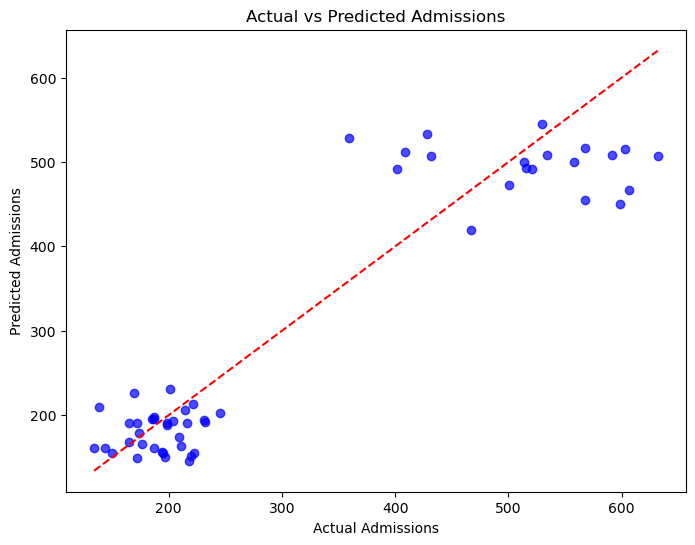

In [34]:
# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Admissions')
plt.ylabel('Predicted Admissions')
plt.title('Actual vs Predicted Admissions')
plt.show()

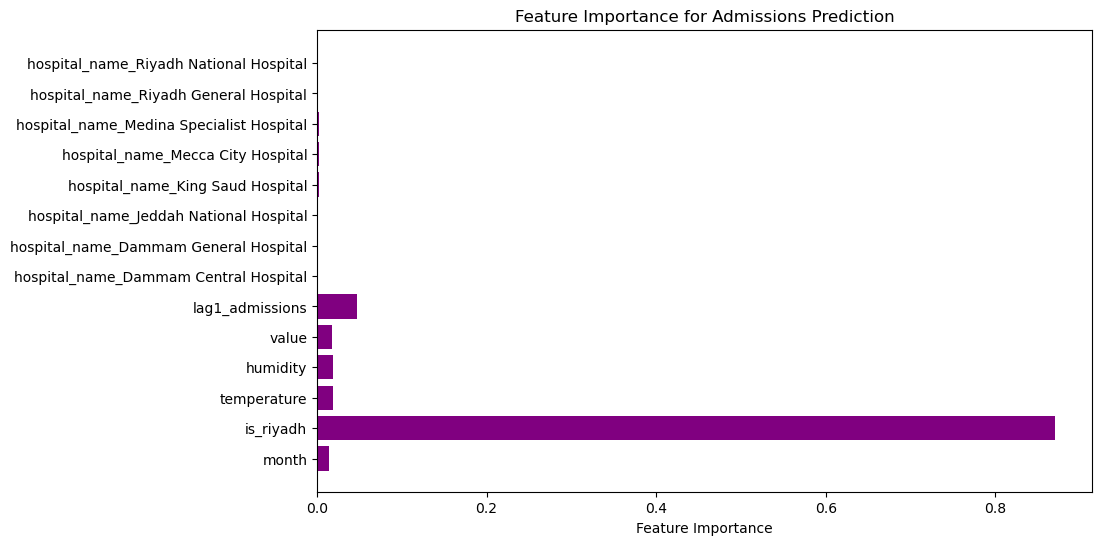

In [35]:
# Get feature importances from the model
feature_importances = model.feature_importances_

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances, color='purple')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Admissions Prediction')
plt.show()

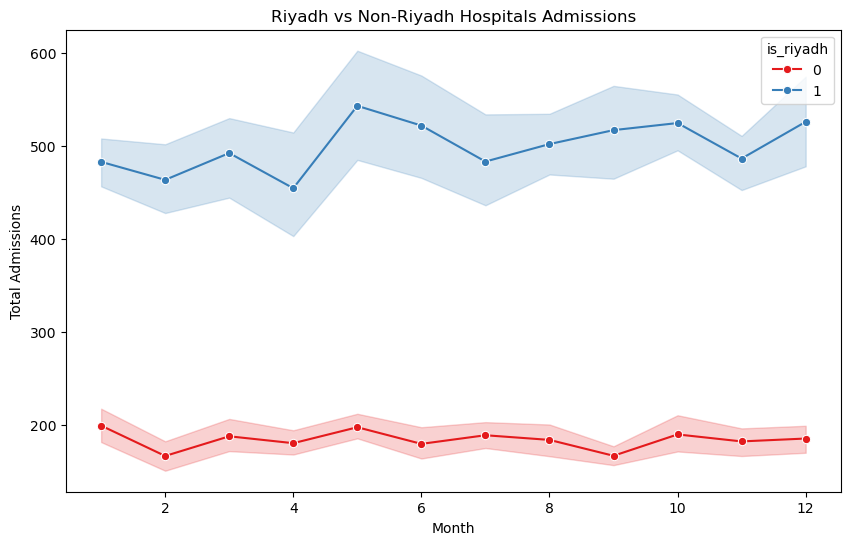

In [36]:
# Plot admissions for Riyadh vs non-Riyadh hospitals
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='admission_count', hue='is_riyadh', data=monthly_hospital_df, 
             palette='Set1', marker='o')
plt.xlabel('Month')
plt.ylabel('Total Admissions')
plt.title('Riyadh vs Non-Riyadh Hospitals Admissions')
plt.show()